In [4]:
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [5]:
# 1. Laad beide CSV-bestanden
df1 = pd.read_csv("movies.csv")  # Films
df2 = pd.read_csv("tvseries.csv")  # Series

# 2. Voeg een 'type' kolom toe
df1["type"] = "film"
df2["type"] = "serie"

# 3. Voeg beide DataFrames samen
combined = pd.concat([df1, df2])

# 4. Bereken gemiddelde rating per jaar
result = (
    combined.groupby("releaseYear", as_index=False)
    .agg({
        "averageRating": "mean",  # Gemiddelde rating per jaar
        "numVotes": "sum",        # Totale votes per jaar (optioneel)
        "title": lambda x: x.nunique(),  # Aantal unieke titels per jaar
        "type": lambda x: ", ".join(x.unique())  # Unieke types per jaar
    })
    .rename(columns={
        "averageRating": "mean_rating",
        "numVotes": "total_votes",
        "title": "unique_titles_count"
    })
)

# 5. Sla het resultaat op
result.to_csv("combined_stats_by_year.csv", index=False)

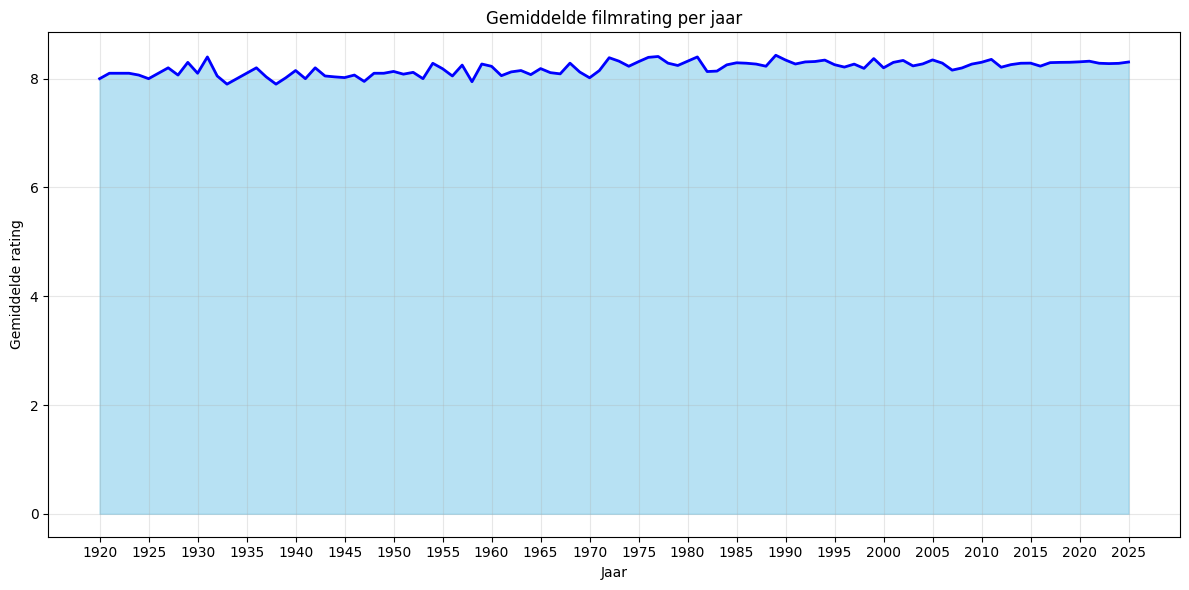

In [7]:
# Laad je data
df = pd.read_csv("combined_stats_by_year.csv")

# Bereken gemiddelde rating per jaar
avg_rating_by_year = df.groupby("releaseYear")["mean_rating"].mean()

# Plot als area plot
plt.figure(figsize=(12, 6))
plt.fill_between(avg_rating_by_year.index, avg_rating_by_year.values, color="skyblue", alpha=0.6)
plt.plot(avg_rating_by_year.index, avg_rating_by_year.values, color="blue", linewidth=2)

plt.title("Gemiddelde filmrating per jaar")
plt.xlabel("Jaar")
plt.ylabel("Gemiddelde rating")
plt.grid(alpha=0.3)
plt.xticks(range(avg_rating_by_year.index.min(), avg_rating_by_year.index.max() + 1, 5))  # Om de 2 jaar

plt.tight_layout()
plt.show()